## Bike Sharing

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px

#machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from statsmodels.stats.stattools import durbin_watson

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset
bike_sharing = pd.read_csv('day.csv')

In [3]:
#shape of the dataset
print('Shape of the dataset:',bike_sharing.shape)

Shape of the dataset: (730, 16)


In [4]:
#displaying the first five rows of the dataset
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#displaing the information of the dataset
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#summary of the dataset
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning

In [7]:
#checking for null values
bike_sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

As seen above, there are no missing values in the dataset

In [8]:
#cheking for duplicate rows
bike_sharing.duplicated().sum()

0

No duplicate rows in the dataset

The target variable is 'cnt' which is the count of total rental bikes including both casual and registered, hence we will drop the columns 'casual' and 'registered'. Also, we will drop the column 'instant' as it is record index.

In [9]:
#dropping the instant, casual and registered columns
bike_sharing.drop(['instant','casual','registered'],axis=1,inplace=True)

In [10]:
#checking the dataset after dropping the columns
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


In [11]:
#convert the dteday column to datetime datatype
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'], format='%d-%m-%Y')

In [12]:
#converting the categorical columns
bike_sharing['season'] = bike_sharing['season'].astype('category')
bike_sharing['weekday'] = bike_sharing['weekday'].astype('category')
bike_sharing['mnth'] = bike_sharing['mnth'].astype('category')
bike_sharing['weathersit'] = bike_sharing['weathersit'].astype('category')

In [13]:
bike_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Visualizing the data

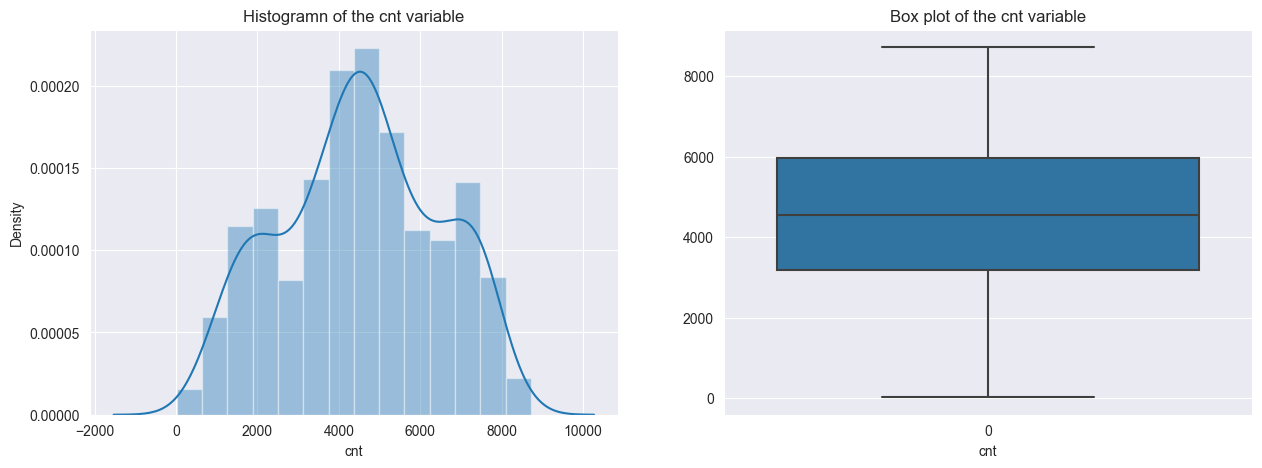

In [14]:
#visualizing the distribution of the cnt variable
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(bike_sharing['cnt'])
plt.title('Histogramn of the cnt variable')

plt.subplot(1,2,2)
sns.boxplot(bike_sharing['cnt'])
plt.xlabel('cnt')
plt.title('Box plot of the cnt variable')
plt.show()

In [15]:
bike_sharing['cnt'].describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

The mean count of bikes rented is 4508 with a standard deviation of 1936. The minimum count is 22 and the maximum count is 8714. 75% of the days have a count of 5966 or less.

In [16]:
#plotting dteday vs cnt using plotly
fig = px.line(bike_sharing,x='dteday',y='cnt',title='dteday vs cnt')
fig.show()

From the above plot, we can see that the count of rental bikes gradually increases year on year. Also, it increased from March to October and then decreased from November to February as it is winter season. There is a sudden drop in the count of rental bikes in second half of December 2019 as it was initial days of COVID-19 pandemic.

In [17]:
bike_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


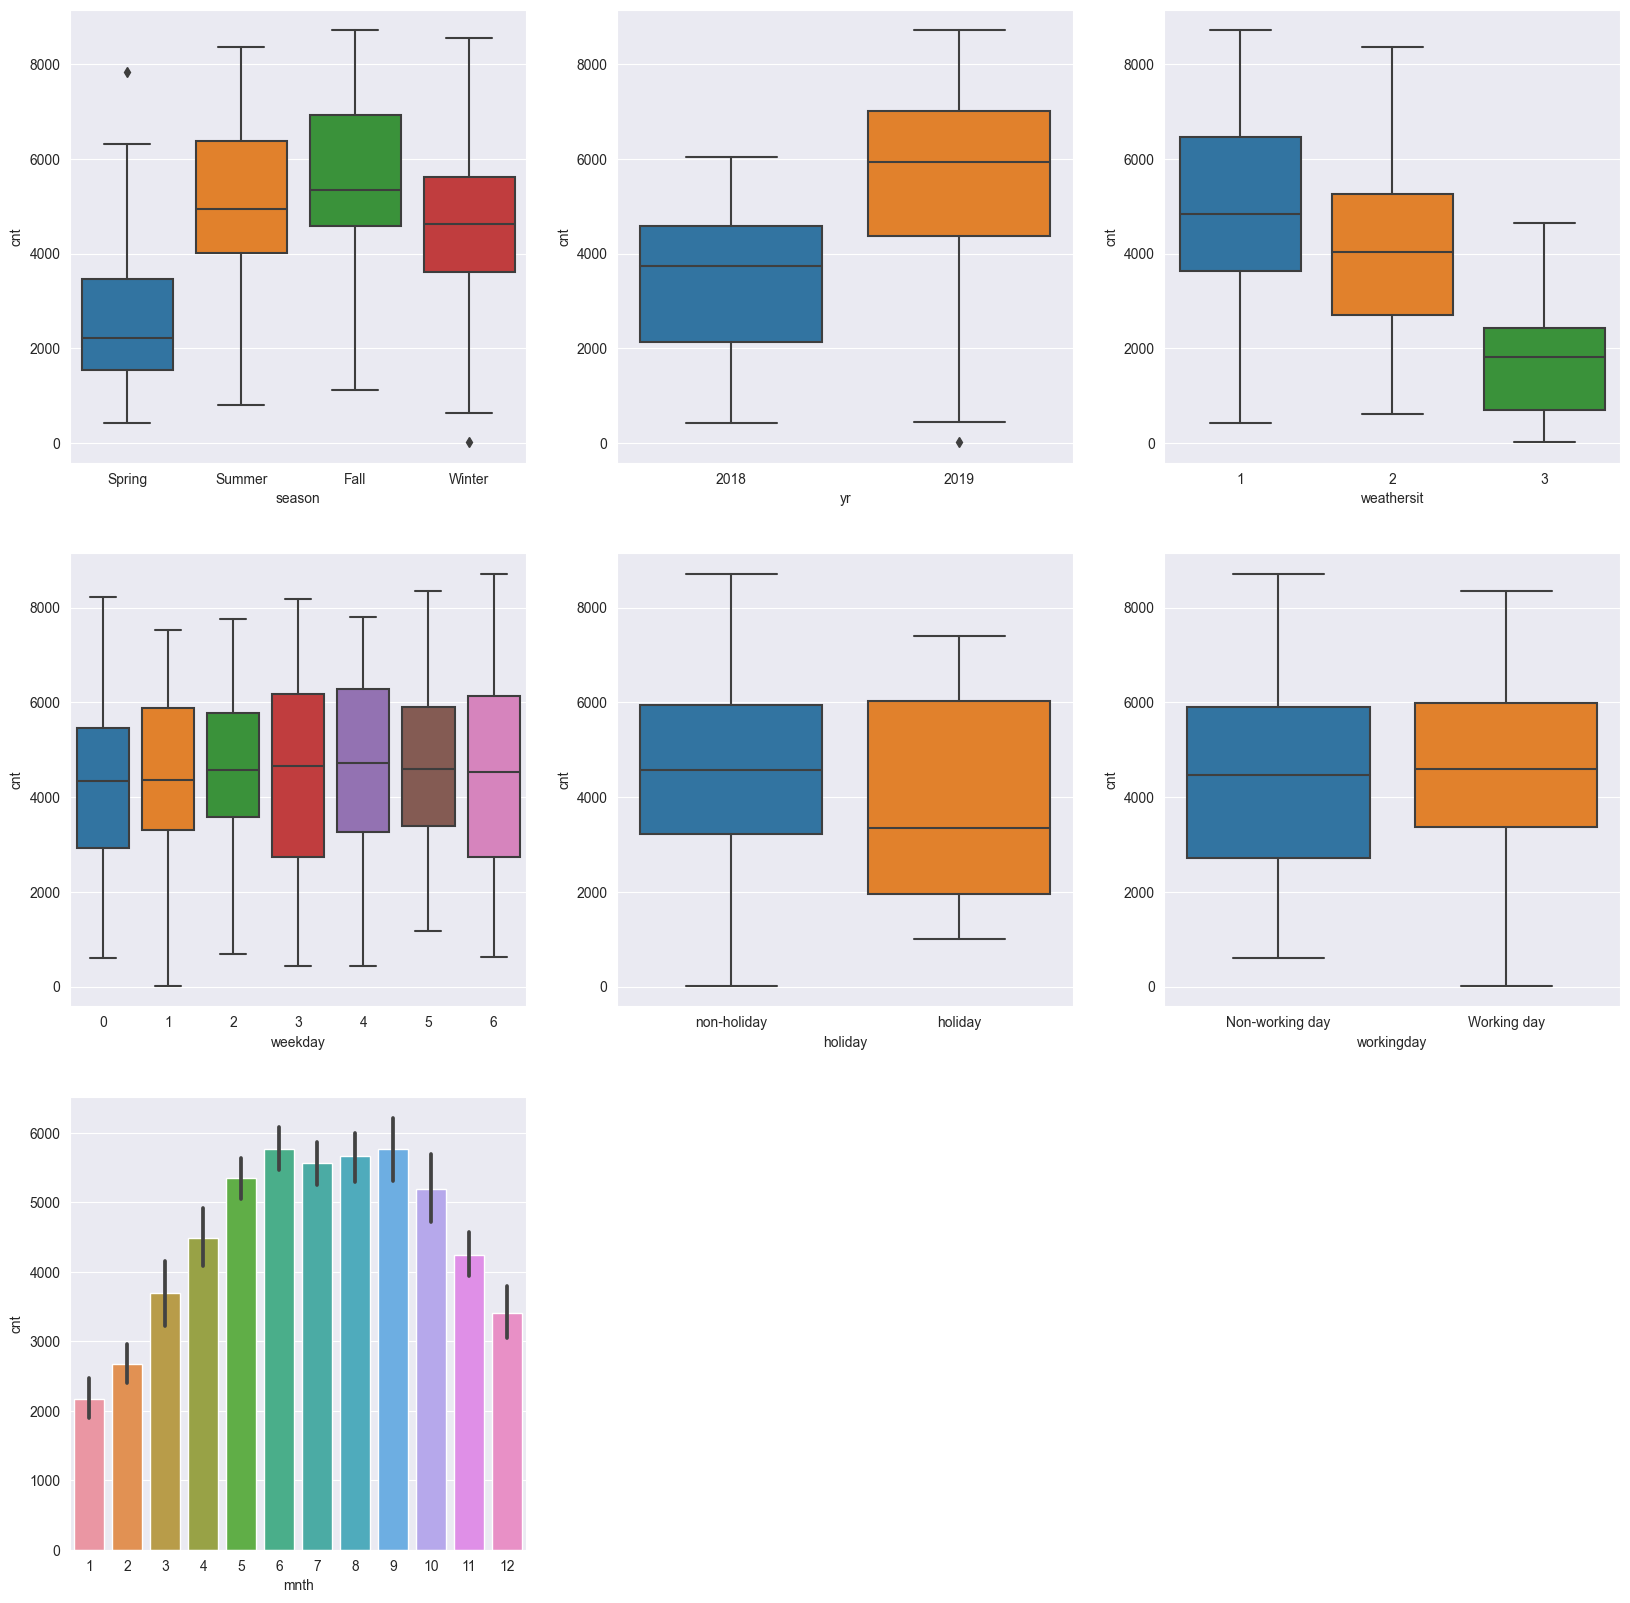

In [18]:
#visualizing the categorical variables
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bike_sharing)
plt.xticks([0,1,2,3],['Spring','Summer','Fall','Winter'])

plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bike_sharing)
plt.xticks([0,1],['2018','2019'])

plt.subplot(3,3,3)
sns.boxplot(x='weathersit',y='cnt',data=bike_sharing)

plt.subplot(3,3,4)
sns.boxplot(x='weekday',y='cnt',data=bike_sharing)

plt.subplot(3,3,5)
sns.boxplot(x='holiday',y='cnt',data=bike_sharing)
plt.xticks([0, 1], ['non-holiday', 'holiday'])

plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=bike_sharing)
plt.xticks([0,1],['Non-working day','Working day'])

plt.subplot(3,3,7)
sns.barplot(x='mnth',y='cnt',data=bike_sharing)
plt.show()

* The count of rental bikes is low during spring season and high during fall season.
* 2019 has more count of rental bikes than 2018.
* The count of rental bikes is high on clear days and low on rainy and snowy days.
* Average count of rental bikes is high on non-holiday and low on holidays.
* The count of rental bikes increases from January to September and then decreases from October to December.

In [19]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    category      
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    category      
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    category      
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    category      
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  cnt         730 non-null    int64         
dtypes: category(4), datetime64[ns](1), float64(4), int64(4)
memory usage: 55.4 KB


<Figure size 2000x2000 with 0 Axes>

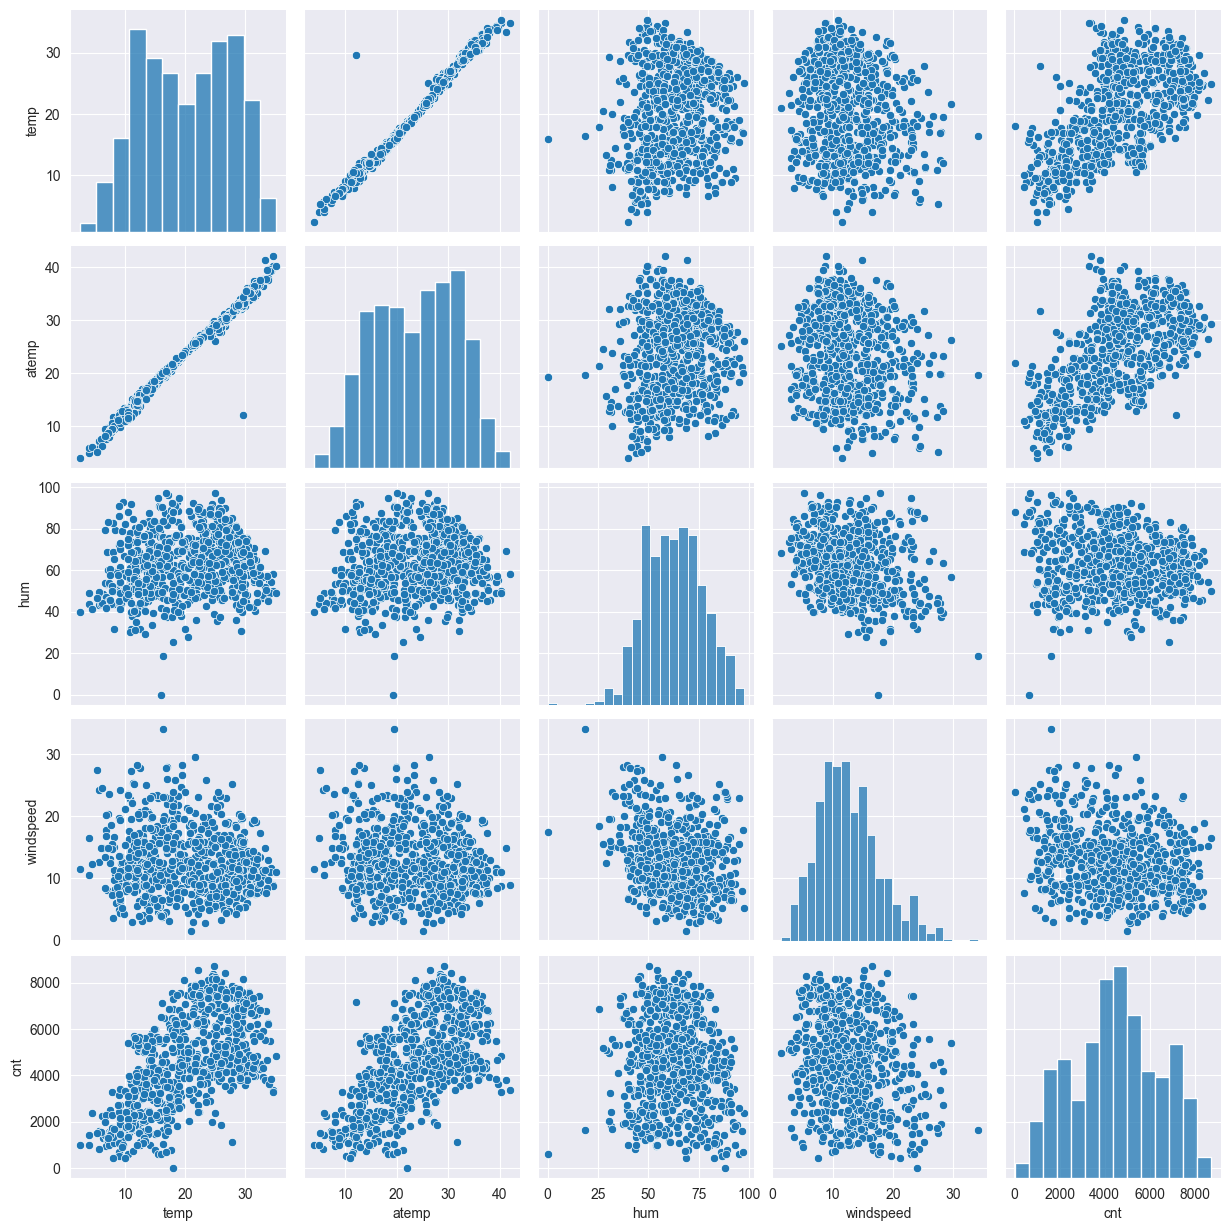

In [20]:
#Visualizing the numerical variables - temp, atemp, hum, windspeed, cnt
plt.figure(figsize=(20,20))
sns.pairplot(bike_sharing[['temp','atemp','hum','windspeed','cnt']])
plt.show()

There is a linear collinearity between temp and atemp. Also temp and atemp are highly correlated with cnt. 

In [21]:
bike_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Dropping the dteday column from the dataset as we have year and month columns in the dataset.

In [22]:
#dropping the dteday column
bike_sharing.drop('dteday',axis=1,inplace=True)

### Data Preparation

Creating dummy variables for the categorical variables. We will drop the first dummy variable from each categorical variable to prevent multicollinearity i.e. dummy variable trap.

In [23]:
#creating dummy variables for the categorical variables - season, mnth, weekday, weathersit
bike_sharing = pd.get_dummies(bike_sharing, drop_first=True, dtype='uint8')


In [24]:
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [25]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

### Splitting the data into train and test

In [26]:
#splitting the dataset into train and test
bike_sharing_train, bike_sharing_test = train_test_split(bike_sharing, train_size=0.7, test_size=0.3, random_state=333)

In [27]:
print('Shape of the train dataset:',bike_sharing_train.shape)
print('Shape of the test dataset:',bike_sharing_test.shape)

Shape of the train dataset: (510, 30)
Shape of the test dataset: (219, 30)


### Rescaling the features

In [28]:
#MinMaxScaler instance
scaler = MinMaxScaler()

In [29]:
#creating a list of numerical variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

In [30]:
#apply scaler() to all the columns except the 'dummy' variables
bike_sharing_train[num_vars] = scaler.fit_transform(bike_sharing_train[num_vars])

In [31]:
#checking the dataset after scaling
bike_sharing_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,0,0,0,0


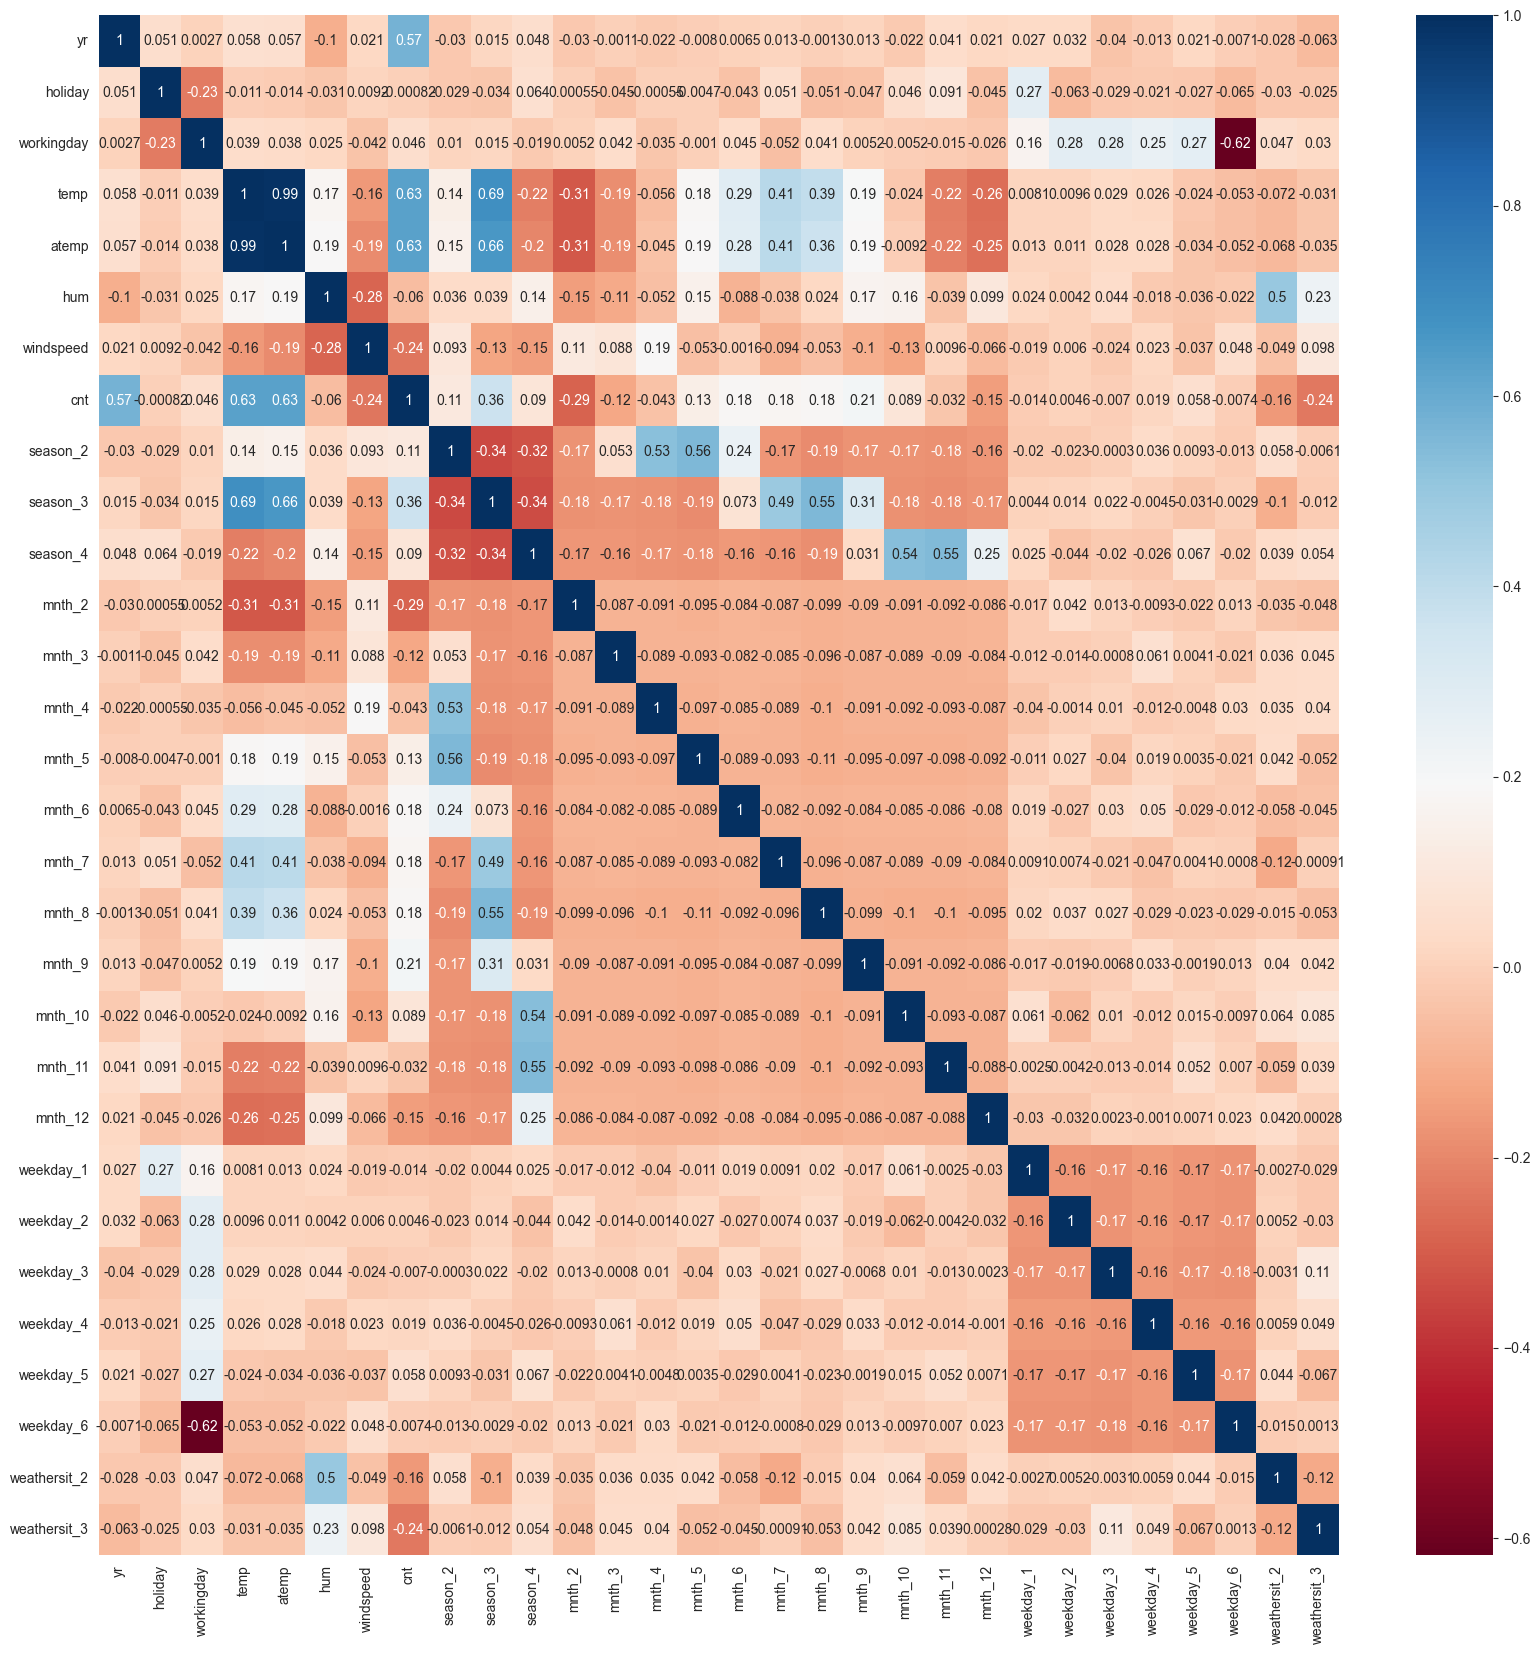

In [32]:
#visualizing correlation 
plt.figure(figsize=(20,20))
sns.heatmap(bike_sharing_train.corr(),annot=True,cmap='RdBu')
plt.show()

### Model Building

Divinding the train data into X and Y. We will use RFE to select the top 15 features.

In [33]:
#Dividing into X and y sets for the model building
y_train = bike_sharing_train.pop('cnt')
X_train = bike_sharing_train

In [34]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,1,0,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0,0,1,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0,1,0,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0,0,1,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#Building a linear model
bike_sharing_lm = LinearRegression()
bike_sharing_lm.fit(X_train,y_train)

#RFE
rfe = RFE(bike_sharing_lm, n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 14),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 15),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', False, 2),
 ('mnth_6', False, 4),
 ('mnth_7', False, 9),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 7),
 ('mnth_12', False, 8),
 ('weekday_1', False, 6),
 ('weekday_2', False, 13),
 ('weekday_3', False, 11),
 ('weekday_4', False, 12),
 ('weekday_5', False, 10),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [37]:
#creating a list of columns selected by RFE
cols = X_train.columns[rfe.support_]
print('RFE selected columns:',cols)

RFE selected columns: Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')


In [38]:
#columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['holiday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [39]:
#Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[cols]

### Building Linear Model using statsmodel

First Model Iteration

In [40]:
#Adding a constant variable
X_train_lm1 = sm.add_constant(X_train_rfe)

#fitting the model with 15 variables
lm1 = sm.OLS(y_train,X_train_lm1).fit()

In [41]:
#checking the parameters i.e coefficient of the model
lm1.params

const           0.195340
yr              0.228741
workingday      0.040787
temp            0.433878
atemp           0.058635
hum            -0.178382
windspeed      -0.184925
season_2        0.130228
season_3        0.079599
season_4        0.153475
mnth_3          0.047149
mnth_9          0.100017
mnth_10         0.054370
weekday_6       0.054618
weathersit_2   -0.047472
weathersit_3   -0.271174
dtype: float64

In [42]:
#checking the summary of the model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.28e-186
Time:                        22:31:01   Log-Likelihood:                 509.26
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     494   BIC:                            -918.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1953      0.030      6.576   

In [43]:
#function to calculate VIF
def get_vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF',ascending=False)
    return vif

In [44]:
#VIF dataframe for 1st model
vif_1 = get_vif(X_train_rfe)
vif_1

,Features,VIF
2,temp,384.22
3,atemp,363.12
4,hum,17.52
7,season_3,7.09
5,windspeed,4.71
1,workingday,4.61
6,season_2,3.54
8,season_4,3.01
13,weathersit_2,2.14
0,yr,2.02


In [45]:
#removing the column 'atemp' as it has high p value and high VIF
X_train_rfe.drop('atemp',axis=1,inplace=True)

Second Model Iteration

In [46]:
#adding a constant variable
X_train_lm2 = sm.add_constant(X_train_rfe)

#fitting the model with 14 variables
lm2 = sm.OLS(y_train,X_train_lm2).fit()

In [47]:
#checking the parameters i.e coefficient of the model
lm2.params

const           0.196221
yr              0.228723
workingday      0.040773
temp            0.489280
hum            -0.177805
windspeed      -0.187198
season_2        0.130352
season_3        0.078664
season_4        0.153732
mnth_3          0.047295
mnth_9          0.100029
mnth_10         0.054438
weekday_6       0.054705
weathersit_2   -0.047620
weathersit_3   -0.271535
dtype: float64

In [48]:
#checking the summary of the model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.00e-187
Time:                        22:31:02   Log-Likelihood:                 509.17
No. Observations:                 510   AIC:                            -988.3
Df Residuals:                     495   BIC:                            -924.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1962      0.030      6.627   

In [49]:
#VIF dataframe for 2nd model
vif_2 = get_vif(X_train_rfe)
vif_2

,Features,VIF
2,temp,23.21
3,hum,17.23
6,season_3,7.01
1,workingday,4.60
4,windspeed,4.55
5,season_2,3.54
7,season_4,3.01
12,weathersit_2,2.14
0,yr,2.02
11,weekday_6,1.79


In [50]:
#removing the column 'mnth_3' as it has high p value
X_train_rfe.drop('mnth_3',axis=1,inplace=True)

Third Model Iteration

In [51]:
#adding a constant variable
X_train_lm3 = sm.add_constant(X_train_rfe)

#fitting the model with 13 variables
lm3 = sm.OLS(y_train,X_train_lm3).fit()

In [52]:
#checking the parameters i.e coefficient of the model
lm3.params

const           0.211540
yr              0.228919
workingday      0.041559
temp            0.491893
hum            -0.189487
windspeed      -0.189192
season_2        0.124901
season_3        0.067970
season_4        0.143950
mnth_9          0.100340
mnth_10         0.054175
weekday_6       0.054296
weathersit_2   -0.044823
weathersit_3   -0.263045
dtype: float64

In [53]:
#checking the summary of the model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.6
Date:                Wed, 10 May 2023   Prob (F-statistic):          5.42e-187
Time:                        22:31:03   Log-Likelihood:                 504.66
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     496   BIC:                            -922.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2115      0.029      7.199   

In [54]:
#VIF dataframe for 3rd model
vif_3 = get_vif(X_train_rfe)
vif_3

,Features,VIF
2,temp,23.12
3,hum,17.21
6,season_3,6.77
1,workingday,4.57
4,windspeed,4.50
5,season_2,3.48
7,season_4,2.87
11,weathersit_2,2.13
0,yr,2.02
10,weekday_6,1.79


In [55]:
#dropping the column 'hum' as it has high VIF value
X_train_rfe.drop('hum',axis=1,inplace=True)

Fourth Model Iteration

In [56]:
#adding a constant variable
X_train_lm4 = sm.add_constant(X_train_rfe)

#fitting the model with 12 variables
lm4 = sm.OLS(y_train,X_train_lm4).fit()

In [57]:
#checking the parameters i.e coefficient of the model
lm4.params

const           0.101578
yr              0.233703
workingday      0.043502
temp            0.457267
windspeed      -0.148191
season_2        0.125590
season_3        0.075997
season_4        0.138405
mnth_9          0.091068
mnth_10         0.052923
weekday_6       0.055026
weathersit_2   -0.076135
weathersit_3   -0.318278
dtype: float64

In [58]:
#checking the summary of the model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.9
Date:                Wed, 10 May 2023   Prob (F-statistic):          9.77e-183
Time:                        22:31:04   Log-Likelihood:                 491.77
No. Observations:                 510   AIC:                            -957.5
Df Residuals:                     497   BIC:                            -902.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1016      0.020      5.000   

In [59]:
#VIF dataframe for 4th model
vif_4 = get_vif(X_train_rfe)
vif_4

,Features,VIF
2,temp,16.66
5,season_3,6.49
3,windspeed,4.22
1,workingday,4.07
4,season_2,3.45
6,season_4,2.76
0,yr,2.02
8,mnth_10,1.66
9,weekday_6,1.66
10,weathersit_2,1.53


In [60]:
#dropping the column 'season_3' as it has high VIF value
X_train_rfe.drop('season_3',axis=1,inplace=True)

Fifth Model Iteration

In [61]:
#adding a constant variable
X_train_lm5 = sm.add_constant(X_train_rfe)

#fitting the model with 11 variables
lm5 = sm.OLS(y_train,X_train_lm5).fit()

In [62]:
#checking the parameters i.e coefficient of the model
lm5.params

const           0.086573
yr              0.232010
workingday      0.043124
temp            0.556363
windspeed      -0.152294
season_2        0.083880
season_4        0.113415
mnth_9          0.101312
mnth_10         0.042869
weekday_6       0.056427
weathersit_2   -0.076488
weathersit_3   -0.312604
dtype: float64

In [63]:
#checking the summary of the model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.9
Date:                Wed, 10 May 2023   Prob (F-statistic):          4.05e-181
Time:                        22:31:05   Log-Likelihood:                 485.14
No. Observations:                 510   AIC:                            -946.3
Df Residuals:                     498   BIC:                            -895.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0866      0.020      4.301   

In [64]:
#VIF dataframe for 5th model
vif_5 = get_vif(X_train_rfe)
vif_5

,Features,VIF
2,temp,4.84
3,windspeed,4.06
1,workingday,4.01
0,yr,2.01
5,season_4,1.94
8,weekday_6,1.65
7,mnth_10,1.63
4,season_2,1.56
9,weathersit_2,1.53
6,mnth_9,1.23


In [65]:
#dropping the column 'mnth_10' as it has high p-value
X_train_rfe.drop('mnth_10',axis=1,inplace=True)

Sixth Model Iteration

In [66]:
#adding a constant variable
X_train_lm6 = sm.add_constant(X_train_rfe)

#fitting the model with 10 variables
lm6 = sm.OLS(y_train,X_train_lm6).fit()

In [67]:
#checking the parameters i.e coefficient of the model
lm6.params

const           0.084143
yr              0.230846
workingday      0.043203
temp            0.563615
windspeed      -0.155191
season_2        0.082706
season_4        0.128744
mnth_9          0.094743
weekday_6       0.056909
weathersit_2   -0.074807
weathersit_3   -0.306992
dtype: float64

In [68]:
#checking the summary of the model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.8
Date:                Wed, 10 May 2023   Prob (F-statistic):          3.77e-181
Time:                        22:31:06   Log-Likelihood:                 482.39
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     499   BIC:                            -896.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0841      0.020      4.168   

In [69]:
#VIF dataframe for 6th model
vif_6 = get_vif(X_train_rfe)
vif_6

,Features,VIF
2,temp,4.72
3,windspeed,4.02
1,workingday,4.01
0,yr,2.00
7,weekday_6,1.65
4,season_2,1.56
8,weathersit_2,1.52
5,season_4,1.38
6,mnth_9,1.20
9,weathersit_3,1.07


This is the final model as all the variables are significant and the R-squared value is 0.823. In addition to this, the VIF values are also less than 5, which means there is no multicollinearity. 

The equation of best fitted line is:  
`cnt = 0.0841 + 0.2308*yr +  0.0432*workingday + 0.5636*temp - 0.1552*windspeed + 0.0827*season_2 + 0.1287*season_4 + 0.0947*mnth_9 + 0.0569*weekday_6 - 0.0748*weathersit_2 - 0.3070*weathersit_3`

### Testing the final model

In [70]:
#list of numeric columns
num_vars = ['temp','atemp','hum','windspeed','cnt']

#applying scaler() to all the columns except the 'dummy' variables
bike_sharing_test[num_vars] = scaler.transform(bike_sharing_test[num_vars])

In [71]:
#checking the dataset after scaling
bike_sharing_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,1,0,0,0,0,1,0


In [72]:
#dividing the test set into X_test and y_test
y_test = bike_sharing_test.pop('cnt')
X_test = bike_sharing_test

In [73]:
#selecting the columns selected by RFE
cols = X_train_rfe.columns
X_test = X_test[cols]

#adding a constant variable
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   weekday_6     219 non-null    uint8  
 9   weathersit_2  219 non-null    uint8  
 10  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [74]:
#predicting the y values corresponding to X_test_lm6
y_pred = lm6.predict(X_test_lm6)

### Model Evaluation

Checking the spread of ytest and ypred

Text(0, 0.5, 'y_pred')

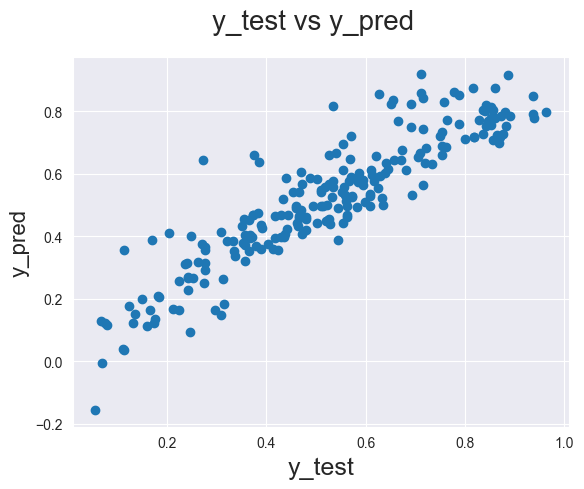

In [75]:
#plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred',fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred',fontsize=16)

R-squared value 

In [76]:
#R-squared value
r2_score(y_test,y_pred)

0.8203092200749706

Adjusted R-squared value

Formula for adjusted R-squared value:  
`Adjusted R-squared = 1 - [(1-R2)*(n-1)/(n-p-1)]`

In [77]:
#calculating the adjusted R-squared value
r2 = r2_score(y_test,y_pred)
n = X_test_lm6.shape[0]
p = X_test_lm6.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("The adjusted R-squared value is: ",adjusted_r2)

The adjusted R-squared value is:  0.8107604346683266


* R-squared value of the model is 0.8203 which is close to the R-squared value of the train data 0.824. 
* Adjusted R-squared value of the model is 0.8107 which is close to the Adjusted R-squared value of the train data 0.821.  
Hence, we can conclude that the model is good.

### Assumptions of Linear Regression

#### Assumption 1: Linear Relationship between the Target and Predictor Variables

<Figure size 2000x1200 with 0 Axes>

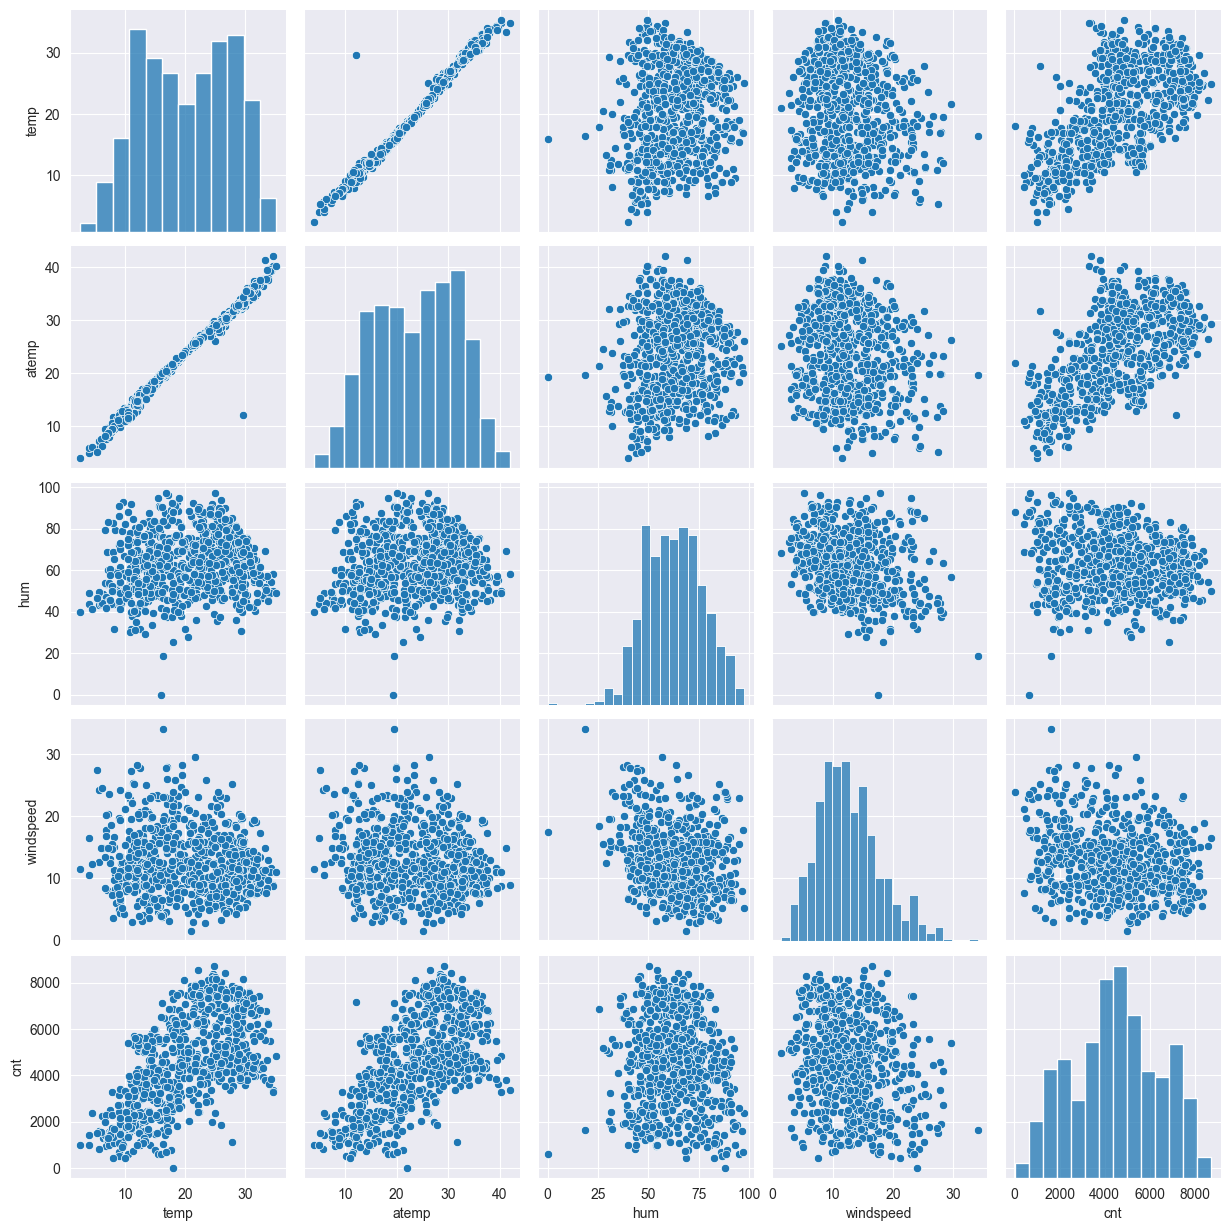

In [78]:
#checking the linear relationship between the target variable and the predictor variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
plt.figure(figsize=(20,12))
sns.pairplot(data=bike_sharing[num_vars])
plt.show()

From the above plot, we can see a linear relationship of temp & atemp variables with cnt variable. 

#### Assumption 2: Residuals are independent of each other

In [79]:
#checking the independence of the residuals using the Durbin-Watson test
residuals = lm6.resid
dw_test = durbin_watson(residuals)
print("The Durbin-Watson test value is: ",dw_test)

The Durbin-Watson test value is:  2.0275977373619676


The Durbain-Watson test value is 2.027 which is close to 2. Hence, we can conclude that the residuals are independent of each other.

### Assumption 3: Error terms must be normally distributed with mean 0

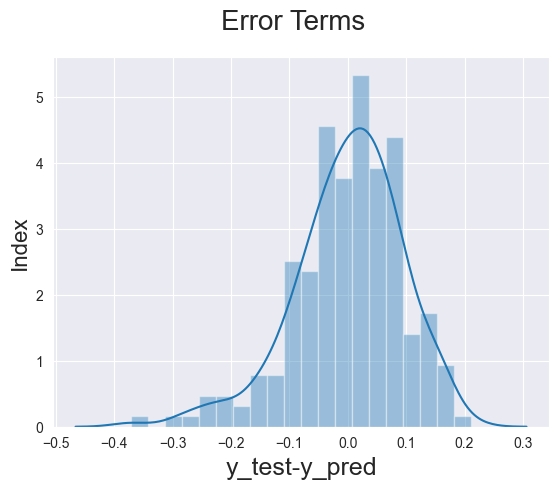

In [80]:
#plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('y_test-y_pred',fontsize=18)
plt.ylabel('Index',fontsize=16)
plt.show()

In [81]:
#average of the error terms
np.mean(y_test-y_pred)

0.0006061024587506334

The error terms are normally distributed with mean 0. Hence, the assumption is satisfied.

### Conclusion

Based on the final model, the top 3 factors affecting the count of rental bikes are:  
1. Temperature - The coefficient of temp is 0.5636, which means that a unit increase in temp will increase the count of rental bikes by 0.5636 units.
2. weathersit_3 - The weathersit_3 indicates ` Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds`. The coefficient of weathersit_3 is -0.3070, which means that a unit increase in weathersit_3 will decrease the count of rental bikes by 0.3070 units.
3. yr  - The coefficient of yr is 0.2308, which means that a unit increase in yr will increase the count of rental bikes by 0.2308 units. Thus we can interpret that the count of rental bikes increases year on year by 0.2308 units.

The other factors affecting the count of rental bikes are:  
1.  windspeed - The coefficient of windspeed is -0.1552, which means that a unit increase in windspeed will decrease the count of rental bikes by 0.1552 units.
2. season_4 - The season_4 indicates `winter`. The coefficient of season_4 is 0.1287, which means that a unit increase in season_4 will increase the count of rental bikes by 0.1287 units.
3. mnth_9 - The mnth_9 indicates `September`. The coefficient of mnth_9 is 0.0947, which means that a unit increase in mnth_9 will increase the count of rental bikes by 0.0947 units.
4. season_2 - The season_2 indicates `summer`. The coefficient of season_2 is 0.0827, which means that a unit increase in season_2 will increase the count of rental bikes by 0.0827 units.
5. weathersit_2 - The weathersit_2 indicates `Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist`. The coefficient of weathersit_2 is -0.0748, which means that a unit increase in weathersit_2 will decrease the count of rental bikes by 0.0748 units.
6. weekday_6 - The coefficient of weekday_6 is 0.0569, which means that a unit increase in weekday_6 will increase the count of rental bikes by 0.0569 units.
7. workingday - The coefficient of workingday is 0.0432, which means that a unit increase in workingday will increase the count of rental bikes by 0.0432 units.  